# Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Market Sentiment Analysis

In [5]:
sp = pd.read_csv('../data/S&P500_CompanyList.csv')
model_df = pd.read_csv('../data/model_df.csv')

#### Combine S&P 500 data with model_df

In [37]:
#removing single and double characters that are too easily mistaken for normal words. We lose 55 of the members of the S&P 500.
sp500 = []
for tick in sp['Ticker']:
    if len(tick) >= 3:
        sp500.append(tick)
        
# get all posts that contains S&P 500 posts 
sp500list = []
ticker = []
index = 0 
for post in model_df['all_text']:   
    for tckr in sp500:
        index += 1
        if tckr in post:
            sp500list.append(post)
            ticker.append(tckr)
        
print(len(sp500))            
print(len(sp500list))
print(len(ticker))

445
11877
11877


In [36]:
# Add date of post, sentiment of post, industry and company name to list

sp500_in_subreddit = pd.DataFrame(list(zip(ticker,sp500list)))

sp500_in_subreddit.rename(columns={sp500_in_subreddit.columns[0]: "ticker", sp500_in_subreddit.columns[1]: "post"}, 
                          inplace = True)

sp500list_reddit = pd.merge(left=sp500_in_subreddit, right=model_df[['datetime', 'sentiment']], 
                            left_on=sp500_in_subreddit['post'], right_on=model_df['all_text'],
                            how = 'left')

sp500list_reddit.drop(columns = 'key_0', inplace = True)

sp500list_reddit = pd.merge(left=sp500list_reddit, right=sp[['Sector', 'Name']], left_on=sp500list_reddit['ticker'], right_on=sp['Ticker'],
        how = 'left')

sp500list_reddit = sp500list_reddit[['ticker', 'post', 'datetime', 'sentiment', 'Sector', 'Name']]

sp500list_reddit.head(3)

,ticker,post,datetime,sentiment,Sector,Name
0,COO,GRWG-GrowGenerationI copy and pasted this arti...,2020-02-17 16:06:53,0.9903,Health Care,The Cooper Companies
1,PEG,Steps to value a stock / panyI am relatively n...,2020-02-17 14:23:03,0.9774,Utilities,Public Service Enterprise Group (PSEG)
2,AMD,QuestionDo you think AMD can ever hit $1000 a ...,2020-02-17 12:09:26,0.9490,Information Technology,Advanced Micro Devices Inc


#### Group sentiment by Ticker

In [11]:
# Group by ticker

ticker_group = sp500list_reddit[sp500list_reddit['datetime'] > '2020-06-01 00:00:00'].groupby(
    ['Name']).agg({'sentiment': ['mean', 'min', 'max', 'count']})

ticker_group.columns = ["mean", "min", "max", "count"]

ticker_group = pd.merge(left=ticker_group, right=sp[['Sector']], left_on=ticker_group.index, right_on=sp['Name'],
        how = 'left')

ticker_group.rename(columns={'key_0': 'Company'})

ticker_group.sort_values(by= 'mean', inplace = True, ascending = False)

ticker_group.head(5)

,key_0,mean,min,max,count,Sector
148,Flowserve Corporation,1.0000,1.0000,1.0000,2,Industrials
212,Leggett & Platt,0.9999,0.9999,0.9999,1,Consumer Discretionary
331,TechnipFMC,0.9998,0.9998,0.9998,1,Energy
67,CMS Energy,0.9998,0.9998,0.9998,1,Utilities
201,Juniper Networks,0.9998,0.9998,0.9998,1,Information Technology


#### Group sentiment by sector

In [21]:
#Group by Sector

ticks_sector_group = sp500list_reddit[sp500list_reddit['datetime'] > '2020-01-01 00:00:00'].groupby(
    ['Sector']).agg({'sentiment': ['mean', 'min', 'max', 'count']})

ticks_sector_group.columns = ["mean", "min", "max", "count"]

ticks_sector_group.sort_values(by= 'mean', inplace = True, ascending = False)

ticks_sector_group.head(11)

,mean,min,max,count
Sector,,,,
Materials,0.752381,-0.9990,1.0000,566
Health Care,0.742113,-0.9990,1.0000,1006
Energy,0.741123,-0.9990,1.0000,359
Industrials,0.710034,-0.9990,1.0000,990
Financials,0.704824,-0.9990,1.0000,1008
Consumer Discretionary,0.694097,-0.9990,1.0000,1767
Consumer Staples,0.688061,-0.9961,1.0000,361
Information Technology,0.684058,-0.9990,1.0000,1960
Utilities,0.674523,-0.9907,0.9999,256


#### Select tickers with only >100 occurances

In [22]:
# Select tickers with only > 100 mentions. 
ticks = ticks_sector_group[ticks_sector_group['count'] > 100]

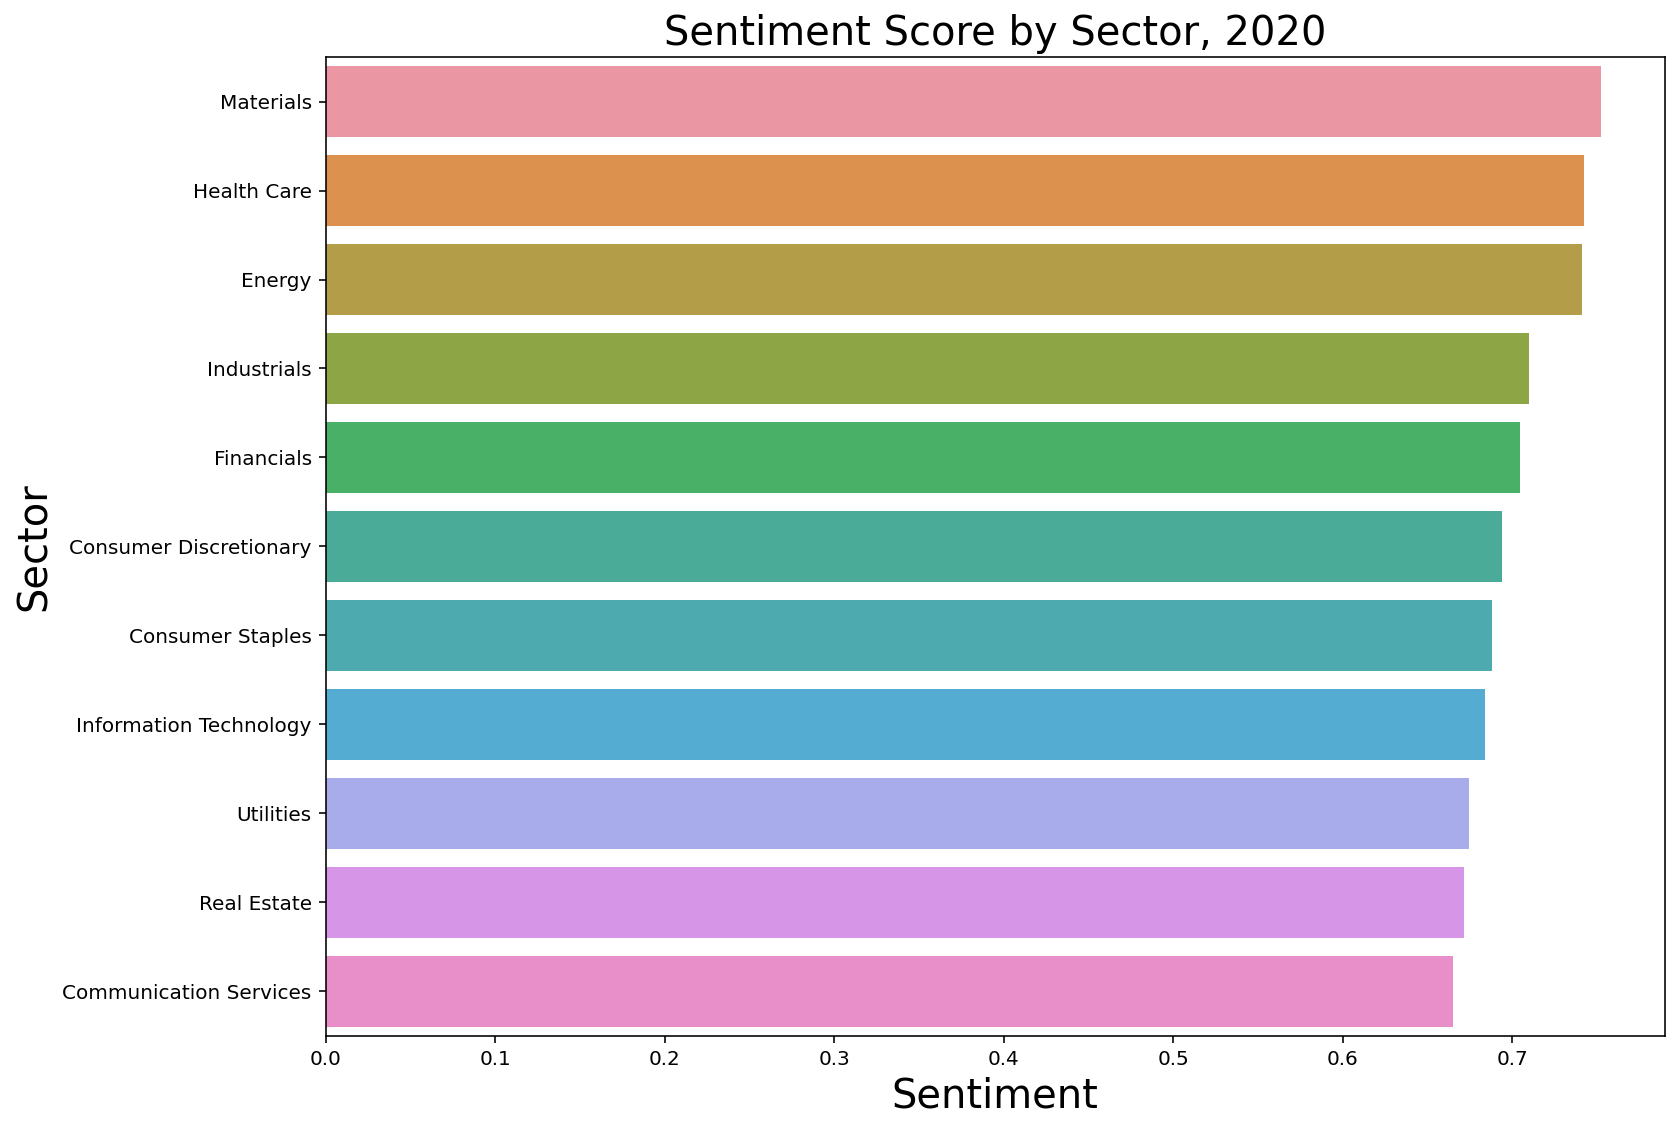

In [33]:
#plot results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(12,9))
plt.title(f'Sentiment Score by Sector, 2020', fontsize=20)
sns.barplot(data=ticks, x="mean", y=ticks.index);
plt.xlabel('Sentiment', fontsize=20);
plt.ylabel('Sector', fontsize=20);

In [34]:
# the chart above in a dataframe
ticks

,mean,min,max,count
Sector,,,,
Materials,0.752381,-0.9990,1.0000,566
Health Care,0.742113,-0.9990,1.0000,1006
Energy,0.741123,-0.9990,1.0000,359
Industrials,0.710034,-0.9990,1.0000,990
Financials,0.704824,-0.9990,1.0000,1008
Consumer Discretionary,0.694097,-0.9990,1.0000,1767
Consumer Staples,0.688061,-0.9961,1.0000,361
Information Technology,0.684058,-0.9990,1.0000,1960
Utilities,0.674523,-0.9907,0.9999,256


#### Sentiment Score by sector for all posts including with less than 100. Pretty much the same.  

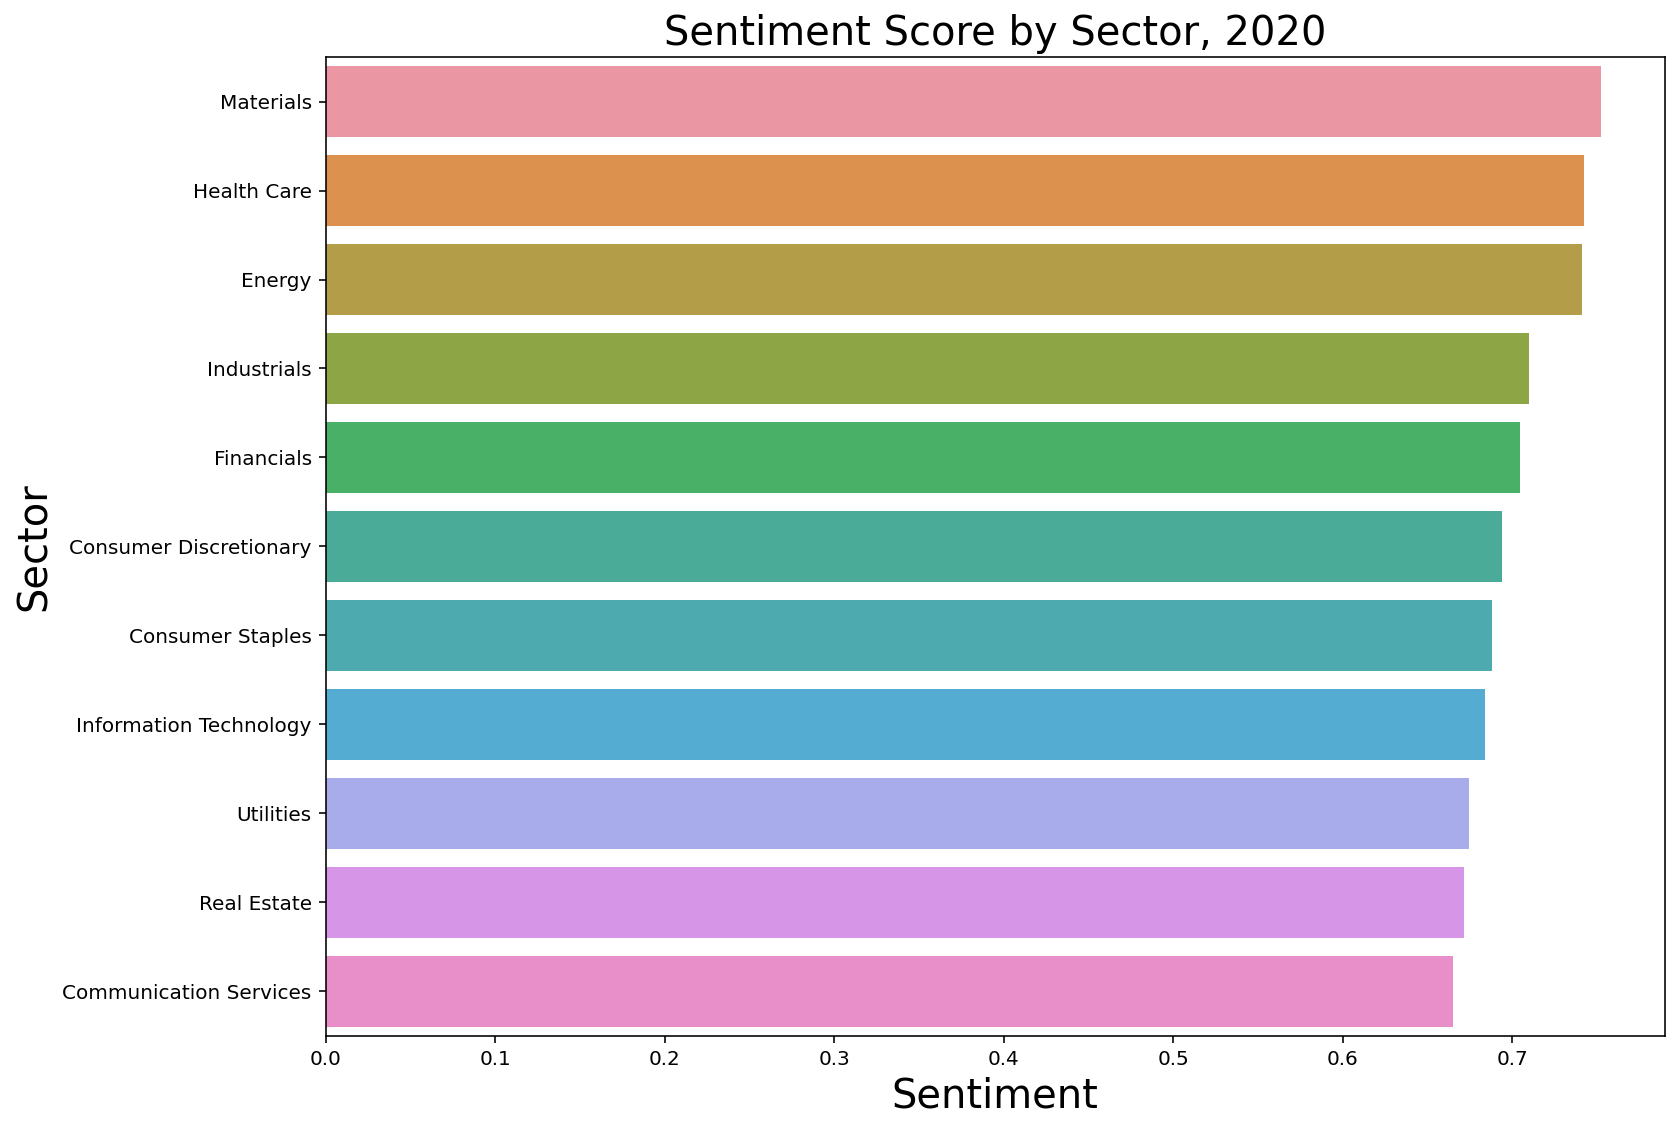

In [26]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(12,9))
plt.title(f'Sentiment Score by Sector, 2020', fontsize=20)
sns.barplot(data=ticks_sector_group, x="mean", y=ticks_sector_group.index);
plt.xlabel('Sentiment', fontsize=20);
plt.ylabel('Sector', fontsize=20);

#### Energy Sector sentiment by company

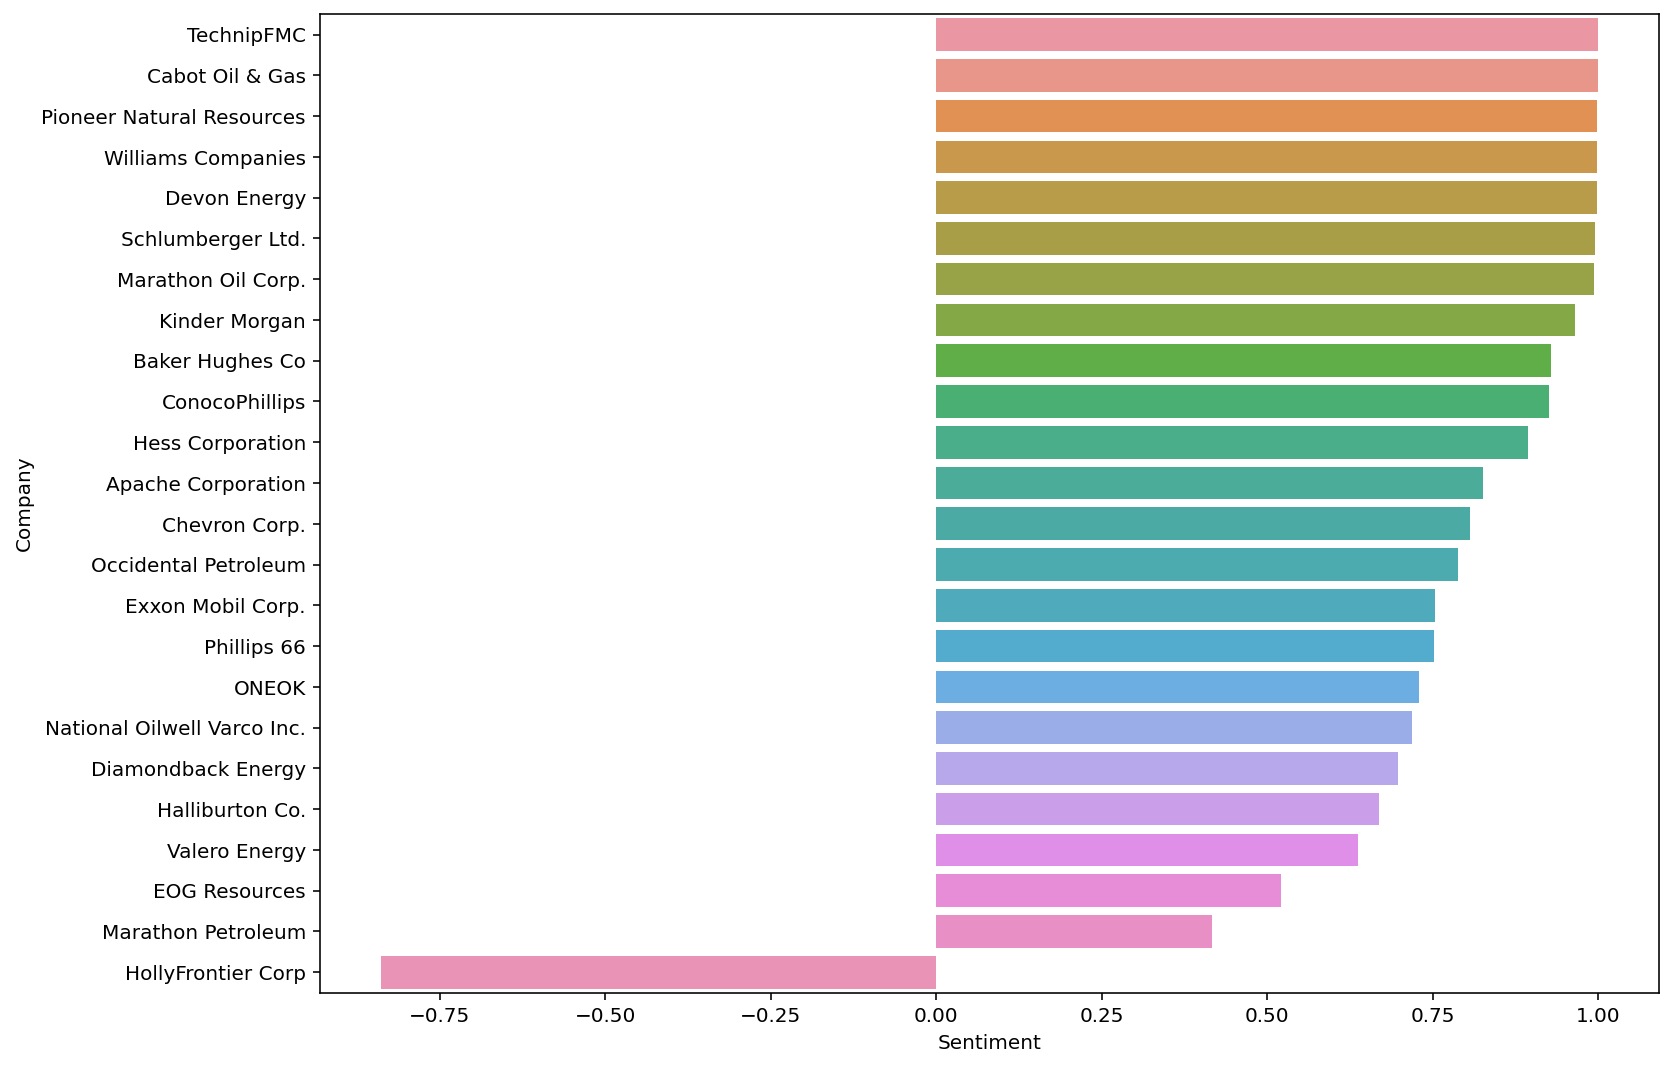

In [35]:
energy = ticker_group.query("Sector == 'Energy'")
plt.figure(figsize=(12,9))
sns.barplot(data=energy, x="mean", y=energy['key_0'])
plt.ylabel('Company');
plt.xlabel('Sentiment');